In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("music.csv")

In [4]:
df

,artist,title,genre,mood,year
0,Casual,I Didn't Mean To,Hip Hop/Rap,sad,1994.0
1,Adam Ant,Something Girls,Rock,happy,1982.0
2,Gob,Face the Ashes,Rock,sad,2007.0
3,Lionel Richie,Tonight Will Be Alright,R&B,happy,1986.0
4,Blue Rodeo,Floating,Rock,sad,1987.0
...,...,...,...,...,...
995,Sade,All About Our Love,R&B,sad,2000.0
996,New Found Glory,Don't Let Her Pull You Down,Rock,happy,2009.0
997,Mindy McCready,Ten Thousand Angels,Country,happy,1996.0
998,Joy Division,Leaders Of Men,Rock,sad,1978.0


In [5]:
df.head()

,artist,title,genre,mood,year
0,Casual,I Didn't Mean To,Hip Hop/Rap,sad,1994.0
1,Adam Ant,Something Girls,Rock,happy,1982.0
2,Gob,Face the Ashes,Rock,sad,2007.0
3,Lionel Richie,Tonight Will Be Alright,R&B,happy,1986.0
4,Blue Rodeo,Floating,Rock,sad,1987.0


In [6]:
df.shape

(1000, 5)

In [7]:
df.dtypes

artist     object
title      object
genre      object
mood       object
year      float64
dtype: object

In [8]:
df.describe()

,year
count,992.000000
mean,1996.123992
std,12.380193
min,1907.000000
25%,1991.000000
50%,2000.000000
75%,2005.000000
max,2011.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   artist  995 non-null    object 
 1   title   993 non-null    object 
 2   genre   993 non-null    object 
 3   mood    990 non-null    object 
 4   year    992 non-null    float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [10]:
df.isnull().sum()

artist     5
title      7
genre      7
mood      10
year       8
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

artist    0
title     0
genre     0
mood      0
year      0
dtype: int64

In [13]:
df[df.year < 1990]

,artist,title,genre,mood,year
1,Adam Ant,Something Girls,Rock,happy,1982.0
3,Lionel Richie,Tonight Will Be Alright,R&B,happy,1986.0
4,Blue Rodeo,Floating,Rock,sad,1987.0
7,SUE THOMPSON,James (Hold The Ladder Steady),Pop,happy,1985.0
12,The Rolling Stones,Angie (1993 Digital Remaster),Rock,sad,1973.0
...,...,...,...,...,...
985,Guns N' Roses,Patience,Rock,sad,1988.0
988,Tampa Red,No Matter How She Done It,Blues,happy,1974.0
991,Minnie Riperton,Lovin' You,R&B,happy,1974.0
992,Mötley Crüe,Merry-Go-Round,Rock,happy,1981.0


In [14]:
df=df[df.year > 1990] # deleteing the songs which are older than 1990

In [15]:
df.shape

(726, 5)

In [16]:
df[df.year < 1990]

,artist,title,genre,mood,year


In [17]:
# making groups of songs with a gap of 5 year
df['year_bins']=pd.cut(x=df['year'],bins=[1990,1995,2000,2005,2010,2015])
print(df)

                  artist                          title        genre   mood  \
0                 Casual               I Didn't Mean To  Hip Hop/Rap    sad   
2                    Gob                 Face the Ashes         Rock    sad   
5                  Tesla              Caught In A Dream         Rock  happy   
8         Five Bolt Main          Made Like This (Live)         Rock    sad   
9            Willie Bobo                 Spanish Grease         Jazz    sad   
..                   ...                            ...          ...    ...   
993                 4Him  Strange Way To Save The World    Christian  happy   
995                 Sade             All About Our Love          R&B    sad   
996      New Found Glory    Don't Let Her Pull You Down         Rock  happy   
997       Mindy McCready            Ten Thousand Angels      Country  happy   
999  Seventh Day Slumber                 Shattered Life         Rock    sad   

       year     year_bins  
0    1994.0  (1990, 199

In [18]:
df['genre'].unique()

array(['Hip Hop/Rap', 'Rock', 'Jazz', 'Country', 'Blues', 'Electronic',
       'R&B', 'Pop', 'Ska', 'Christian', 'Soul', 'Dance'], dtype=object)

In [19]:
#to encode variables to numeric form for easy understanding of machines
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['genre'])

array([ 5,  9,  9,  9,  6,  9,  2,  0,  6,  5,  4,  9,  9,  5,  9,  9,  9,
        5,  5,  2,  8,  9,  7,  5, 10,  9,  9,  1,  9,  8,  5,  9,  9,  4,
        9,  8,  7,  7,  9,  5,  9,  9,  9,  9,  9,  9,  5,  7,  9,  9,  9,
        9,  5,  7,  9,  9,  5,  7,  9,  9,  5,  7,  9,  5,  7,  9,  9,  7,
        9,  9,  9,  9,  5,  9,  8,  1,  9,  9,  9,  9,  9,  9,  9,  9,  5,
        7,  4,  7,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9,  7,  9,  0,  6,
        9,  2,  9,  9,  9,  9,  9,  4,  5,  9, 11,  5,  9,  9,  9,  5,  9,
        1,  5,  4,  2,  9,  9,  7,  9,  9,  9,  0,  9,  9,  9,  8,  5,  4,
        7,  9, 10,  9,  9,  9,  9,  9,  9,  1,  7,  9,  7,  9,  4,  9,  9,
        9,  9,  5,  5,  8,  9,  9,  7,  9,  9,  6,  9,  1,  5,  9,  7,  9,
        9,  1,  9,  7,  9,  9,  9,  7,  9,  5,  5,  9,  9,  5,  9,  9,  2,
        9,  5,  9,  2,  4,  0,  9,  9,  9,  7,  7,  9,  9,  9,  9,  7,  5,
        9,  9,  9,  7,  5,  8,  7,  9,  5,  4,  5,  2,  0,  2,  5,  5,  9,
       11,  9,  2,  9,  5

In [20]:
df['genre id']=le.fit_transform(df['genre'])

In [21]:
df.head()

,artist,title,genre,mood,year,year_bins,genre id
0,Casual,I Didn't Mean To,Hip Hop/Rap,sad,1994.0,"(1990, 1995]",5
2,Gob,Face the Ashes,Rock,sad,2007.0,"(2005, 2010]",9
5,Tesla,Caught In A Dream,Rock,happy,2004.0,"(2000, 2005]",9
8,Five Bolt Main,Made Like This (Live),Rock,sad,2006.0,"(2005, 2010]",9
9,Willie Bobo,Spanish Grease,Jazz,sad,1997.0,"(1995, 2000]",6


In [22]:
df

,artist,title,genre,mood,year,year_bins,genre id
0,Casual,I Didn't Mean To,Hip Hop/Rap,sad,1994.0,"(1990, 1995]",5
2,Gob,Face the Ashes,Rock,sad,2007.0,"(2005, 2010]",9
5,Tesla,Caught In A Dream,Rock,happy,2004.0,"(2000, 2005]",9
8,Five Bolt Main,Made Like This (Live),Rock,sad,2006.0,"(2005, 2010]",9
9,Willie Bobo,Spanish Grease,Jazz,sad,1997.0,"(1995, 2000]",6
...,...,...,...,...,...,...,...
993,4Him,Strange Way To Save The World,Christian,happy,2000.0,"(1995, 2000]",1
995,Sade,All About Our Love,R&B,sad,2000.0,"(1995, 2000]",8
996,New Found Glory,Don't Let Her Pull You Down,Rock,happy,2009.0,"(2005, 2010]",9
997,Mindy McCready,Ten Thousand Angels,Country,happy,1996.0,"(1995, 2000]",2


In [23]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['mood'])
one_hot_encoded_data

,artist,title,genre,year,year_bins,genre id,mood_happy,mood_sad
0,Casual,I Didn't Mean To,Hip Hop/Rap,1994.0,"(1990, 1995]",5,0,1
2,Gob,Face the Ashes,Rock,2007.0,"(2005, 2010]",9,0,1
5,Tesla,Caught In A Dream,Rock,2004.0,"(2000, 2005]",9,1,0
8,Five Bolt Main,Made Like This (Live),Rock,2006.0,"(2005, 2010]",9,0,1
9,Willie Bobo,Spanish Grease,Jazz,1997.0,"(1995, 2000]",6,0,1
...,...,...,...,...,...,...,...,...
993,4Him,Strange Way To Save The World,Christian,2000.0,"(1995, 2000]",1,1,0
995,Sade,All About Our Love,R&B,2000.0,"(1995, 2000]",8,0,1
996,New Found Glory,Don't Let Her Pull You Down,Rock,2009.0,"(2005, 2010]",9,1,0
997,Mindy McCready,Ten Thousand Angels,Country,1996.0,"(1995, 2000]",2,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292456D6708>,
      dtype=object)

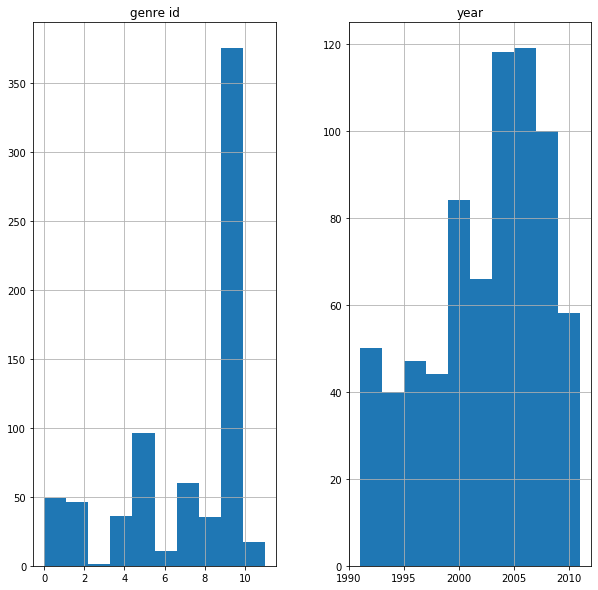

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(10,10))